In [2]:
##importing drive and uploading datasets
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
##importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings         
warnings.filterwarnings('ignore')

In [0]:
##reading in the all accounts dataset
all_account = pd.read_csv('all_accounts.csv')




In [6]:
##checking the first 5 rows of the data

all_account.head()

,CUSTOMER_UNIQUE_ID,MASKED_ACCOUNT,RECORD_STAT,ACY_AVL_BAL,CCY
0,69090004,00******87,O,625.00,GBP
1,69090004,08******25,O,0.00,NGN
2,69090004,07******90,C,0.00,USD
3,69090004,00******24,O,245.16,USD
4,69090004,00******12,O,1262799.23,NGN


In [7]:
##checking the columns of the dataset

all_account.columns

Index(['CUSTOMER_UNIQUE_ID', 'MASKED_ACCOUNT', 'RECORD_STAT', 'ACY_AVL_BAL',
       'CCY'],
      dtype='object')

In [0]:
##converting the upper case features to lower class to make my eda easier

all_account.columns = all_account.columns.str.lower()

In [9]:
all_account.columns

Index(['customer_unique_id', 'masked_account', 'record_stat', 'acy_avl_bal',
       'ccy'],
      dtype='object')

In [0]:
##setting the customer unique id row as index

all_account.set_index('customer_unique_id',inplace=True)


In [0]:
##converting the type of features to int as customer unique id is a number 

all_account.index = all_account.index.astype('int')

In [12]:
##taking the count of the record_stat column to know what I am dealing with

all_account['record_stat'].value_counts()

O    27281
C     1776
Name: record_stat, dtype: int64

In [13]:
##taking the count of the currency column to know what I am dealing with


all_account['ccy'].value_counts()

NGN    26765
USD     2082
GBP      146
EUR       64
Name: ccy, dtype: int64

In [14]:
#getting information about the dataset

all_account.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29057 entries, 69090004 to 429858000
Data columns (total 4 columns):
masked_account    29057 non-null object
record_stat       29057 non-null object
acy_avl_bal       29057 non-null float64
ccy               29057 non-null object
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [15]:
##checking for missing values

all_account.isnull().sum()

masked_account    0
record_stat       0
acy_avl_bal       0
ccy               0
dtype: int64

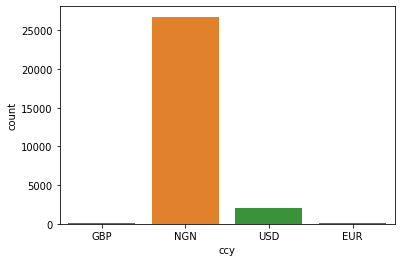

In [16]:
##visualizing the countplot of currency 

sns.countplot( x= 'ccy', data = all_account)

In [17]:
all_account.groupby('ccy')['acy_avl_bal'].count()


ccy
EUR       64
GBP      146
NGN    26765
USD     2082
Name: acy_avl_bal, dtype: int64

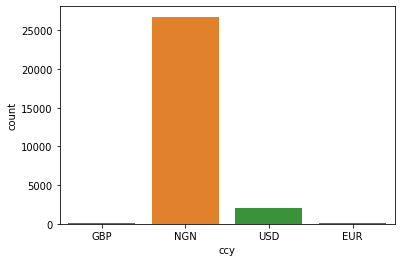

In [18]:
##visualizing the countplot of currency 

sns.countplot( x= 'ccy', data = all_account)

In [19]:
all_account.groupby('ccy')['acy_avl_bal'].sum()

ccy
EUR    1.610430e+03
GBP    5.386260e+03
NGN    6.279908e+08
USD    7.849541e+05
Name: acy_avl_bal, dtype: float64

In [20]:
##checking the first 5 first rows of the dataset

all_account.head()

,masked_account,record_stat,acy_avl_bal,ccy
customer_unique_id,,,,
69090004,00******87,O,625.00,GBP
69090004,08******25,O,0.00,NGN
69090004,07******90,C,0.00,USD
69090004,00******24,O,245.16,USD
69090004,00******12,O,1262799.23,NGN


In [0]:
##converting the various currencies to naira using current fx price
def con(df):
    df.loc[df.ccy =='USD','acy_avl_bal'] = df.loc[df.ccy =='USD','acy_avl_bal'].apply(lambda x: x*365.50)
    df.loc[df.ccy =='EUR','acy_avl_bal'] = df.loc[df.ccy =='EUR','acy_avl_bal'].apply(lambda x: x*410.95)
    df.loc[df.ccy =='GBP','acy_avl_bal']=df.loc[df.ccy =='GPB','acy_avl_bal'].apply(lambda x: x*473.74)
    return df

In [0]:
##setting all_accounts as avariable to the def function

all_account = con(all_account)

In [23]:
all_account.head()

,masked_account,record_stat,acy_avl_bal,ccy
customer_unique_id,,,,
69090004,00******87,O,NaN,GBP
69090004,08******25,O,0.00,NGN
69090004,07******90,C,0.00,USD
69090004,00******24,O,89605.98,USD
69090004,00******12,O,1262799.23,NGN


In [24]:
all_account.shape

(29057, 4)

In [25]:
##checking for missing values

all_account.isnull().sum()

masked_account      0
record_stat         0
acy_avl_bal       146
ccy                 0
dtype: int64

In [0]:
##importing nan from numpy

from numpy import nan

In [0]:
##replacing 0 values by representing them with  nan

all_account.replace({'acy_avl_bal': {0.00 : nan}}, inplace = True)

In [28]:
all_account.isnull().sum()

masked_account        0
record_stat           0
acy_avl_bal       12551
ccy                   0
dtype: int64

In [29]:
##shape fof the dataset
all_account.shape

(29057, 4)

In [0]:
##dropping na values

all_account.dropna(inplace = True)

In [33]:
all_account.head()

,masked_account,record_stat,acy_avl_bal,ccy
customer_unique_id,,,,
69090004,00******24,O,89605.980,USD
69090004,00******12,O,1262799.230,NGN
69090004,07******13,O,28.090,NGN
69090004,07******05,O,13717.215,USD
69090004,00******44,O,37128.660,NGN


In [34]:
##looking at the shape of the dataset
all_account.shape

(16506, 4)

In [0]:
##dropping columns I do not need

all_account = all_account.drop(columns = ['masked_account', 'ccy'])

In [36]:
all_account.head()

,record_stat,acy_avl_bal
customer_unique_id,,
69090004,O,89605.980
69090004,O,1262799.230
69090004,O,28.090
69090004,O,13717.215
69090004,O,37128.660


In [37]:
##taking the count of the column below

all_account['record_stat'].value_counts()

O    16506
Name: record_stat, dtype: int64

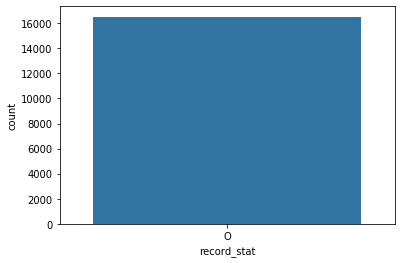

In [38]:
sns.countplot( x= 'record_stat', data = all_account)

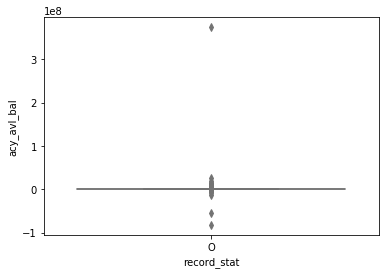

In [39]:

##plotting a boxplot of record stat vs average balance

sns.boxplot( x ='record_stat', y = 'acy_avl_bal', data = all_account, palette = 'rainbow')

In [40]:
##summary statistics of some columns

all_account.acy_avl_bal.min()

-82543569.7

In [41]:
all_account.acy_avl_bal.max()

374284993.52500004

In [42]:
all_account.acy_avl_bal.mean()

55467.91194374742

In [43]:
all_account.acy_avl_bal.std()

3044454.8239729083

In [44]:
##checking the datatype

all_account.dtypes

record_stat     object
acy_avl_bal    float64
dtype: object

In [47]:
all_account.head()

,record_stat,acy_avl_bal
customer_unique_id,,
69090004,O,89605.980
69090004,O,1262799.230
69090004,O,28.090
69090004,O,13717.215
69090004,O,37128.660


In [48]:
all_account.shape

(16506, 2)

In [0]:
all_account = all_account.groupby(all_account.index).agg({'acy_avl_bal':'sum'})

In [50]:
all_account.head()

,acy_avl_bal
customer_unique_id,
56000,136043.480
62005,1541733.575
104008,12364.060
175007,20029.550
200006,61489.560


In [51]:
all_account.shape

(12994, 1)

In [0]:
all_account.to_csv('df_account.csv', encoding = 'utf-8', index = True)

In [0]:
df = pd.read_csv('df_account.csv',skiprows = 0)

In [60]:
df.head()

,customer_unique_id,acy_avl_bal
0,56000,136043.480
1,62005,1541733.575
2,104008,12364.060
3,175007,20029.550
4,200006,61489.560


In [0]:
##reading in the all balances dataset

all_balances = pd.read_csv('all_balances.csv')

In [62]:
all_balances.head(10)

,CUSTOMER_UNIQUE_ID,MASKED_ACCOUNT,VAL_DT,BAL
0,47222000,00******35,9/8/2019,8235177.02
1,47222000,00******35,9/9/2019,8087464.52
2,47222000,00******35,9/10/2019,9173359.52
3,47222000,00******35,9/11/2019,9148307.02
4,47222000,00******35,9/12/2019,9149437.02
5,47222000,00******35,9/13/2019,9067077.02
6,47222000,00******35,9/14/2019,9046165.68
7,47222000,00******35,9/16/2019,7674405.68
8,47222000,00******35,9/17/2019,7536900.68
9,47222000,00******35,9/18/2019,7496848.18


In [63]:
all_balances.shape

(1347678, 4)

In [64]:
all_balances.columns

Index(['CUSTOMER_UNIQUE_ID', 'MASKED_ACCOUNT', 'VAL_DT', 'BAL'], dtype='object')

In [0]:
all_balances.columns = all_balances.columns.str.lower()

In [66]:
all_balances.columns

Index(['customer_unique_id', 'masked_account', 'val_dt', 'bal'], dtype='object')

In [0]:
all_balances.set_index('customer_unique_id',inplace=True)


In [0]:
all_balances.index = all_balances.index.astype('int')

In [69]:
all_balances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347678 entries, 47222000 to 306042003
Data columns (total 3 columns):
masked_account    1347678 non-null object
val_dt            1347678 non-null object
bal               1347678 non-null float64
dtypes: float64(1), object(2)
memory usage: 41.1+ MB


In [70]:
all_balances.isnull().any(axis=1).sum()

0

In [71]:
all_balances.isnull().sum()

masked_account    0
val_dt            0
bal               0
dtype: int64

In [0]:
##applying a sort and groupby function to sort val by picking/grouping the last date of transaction for each unique customer balance

all_balances = all_balances.sort_values('val_dt').groupby(all_balances.index).tail(1)

In [73]:
##shape of the dataset

all_balances.shape

(17496, 3)

In [74]:
##summary stats

all_balances.bal.min()

-971931.55

In [75]:
all_balances.bal.max()

23500099.97

In [76]:
all_balances.bal.mean()

60305.08157235931

In [77]:
all_balances.bal.median()

4766.665

In [78]:
all_balances.bal.std()

398449.6722271348

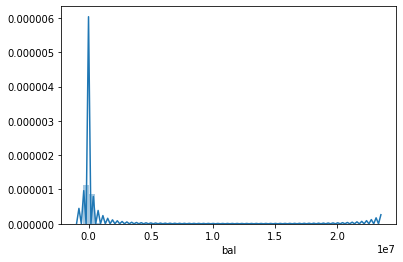

In [79]:
##distribution plot to see the distribution of the bal column in the dataset
##I observed the data is skewwed to the left meaning it isn't a normal distribution

sns.distplot(all_balances['bal'])

In [80]:
##checking the minimum date and maximum date

all_balances.val_dt.min()

'10/1/2019'

In [81]:
all_balances.val_dt.max()

'9/9/2019'

In [0]:
##dropping columns I do not need

all_balances.drop(columns = 'masked_account', inplace = True)

In [83]:
all_balances.head()

,val_dt,bal
customer_unique_id,,
278604001,10/1/2019,20017.89
936686000,10/1/2019,77327.98
344873019,10/1/2019,27.57
656653006,10/1/2019,1000.00
492905009,10/1/2019,17058.14


In [84]:
all_balances.shape

(17496, 2)

In [85]:
all_balances.index.min()

62005

In [86]:
all_balances.index.max()

999944001

In [0]:
all_balances.to_csv('df_balances.csv', encoding = 'utf-8', index = True)


In [0]:
 df_balances = pd.read_csv('df_balances.csv',skiprows = 0)

In [90]:
df_balances.head()

,customer_unique_id,val_dt,bal
0,278604001,10/1/2019,20017.89
1,936686000,10/1/2019,77327.98
2,344873019,10/1/2019,27.57
3,656653006,10/1/2019,1000.00
4,492905009,10/1/2019,17058.14


In [0]:
##working with the demographics dataset

all_demo = pd.read_csv('all_demographics.csv', sep = '|', low_memory=False)

In [220]:
all_demo.head(10)

,CUSTOMER_UNIQUE_ID,CUSTOMER_TYPE,ADDRESS_LINE3,ADDRESS_LINE4,COUNTRY,NATIONALITY,LANGUAGE,EXPOSURE_COUNTRY,LOCAL_BRANCH,FROZEN,DECEASED,WHEREABOUTS_UNKNOWN,CUSTOMER_CATEGORY,HO_AC_NO,FX_CUST_CLEAN_RISK_LIMIT,OVERALL_LIMIT,FX_CLEAN_RISK_LIMIT,CREDIT_RATING,LIMIT_CCY,CAS_CUST,LIAB_NODE,SEC_CUST_CLEAN_RISK_LIMIT,SEC_CLEAN_RISK_LIMIT,SEC_CUST_PSTL_RISK_LIMIT,SEC_PSTL_RISK_LIMIT,LIAB_BR,PAST_DUE_FLAG,DEFAULT_MEDIA,SSN,SWIFT_CODE,LOC_CODE,UTILITY_PROVIDER,UTILITY_PROVIDER_ID,RISK_PROFILE,DEBTOR_CATEGORY,UDF_1,UDF_2,UDF_3,UDF_4,UDF_5,...,PINCODE,MFI_CUSTOMER,CUSTOMER_PREFIX,DATE_OF_BIRTH,MINOR,SEX,RESIDENT_STATUS,AGE_PROOF_SUBMITTED,CUST_COMM_MODE,PLACE_OF_BIRTH,BIRTH_COUNTRY,US_RES_STATUS,VST_US_PREV,P_PINCODE,PREF_CONTACT_DT,PREF_CONTACT_TIME,D_PINCODE,EDUCATIONAL_STATUS,MARITAL_STATUS,SPOUSE_NAME,SPOUSE_EMP_STATUS,DEPENDENT_CHILDREN,DEPENDENT_OTHERS,ACCOMODATION,EMPLOYMENT_STATUS,EMPLOYMENT_TENURE,RETIREMENT_AGE,PREV_DESIGNATION,PREV_EMPLOYER,DESIGNATION,SALARY,OTHER_INCOME,RENT,INSURANCE,LOAN_PAYMENT,OTHER_EXPENSES,HOUSE_VALUE,CREDIT_CARDS,E_COUNTRY,CCY_PERS_INCEXP
0,18030000,I,", IKOYI",LAGOS,NG,NG,ENG,NG,3,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,3,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23401,N,MR,1966-08-15 00:00:00,N,M,R,N,E,NaN,NG,N,N,NaN,NaN,0.0,NaN,NaN,M,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33020001,I,", IKORODU",LAGOS,NG,NG,ENG,NG,6,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,6,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MR,1950-01-01 00:00:00,N,M,R,N,NaN,NaN,NG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69090004,I,Lagos State,", VICTORIA ISLAND",NG,NG,ENG,NG,14,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,14,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,N,Ms.,1970-04-10 00:00:00,N,F,R,N,E,NaN,NG,N,N,NaN,NaN,0.0,NaN,NaN,M,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81010006,I,"SHAGAMU ROAD, IKORODU",LAGOS,NG,NG,ENG,NG,6,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,6,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,NaN,MR,1967-04-26 00:00:00,N,M,R,N,NaN,NaN,NG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71120007,I,", SURULERE",LAGOS,NG,NG,ENG,NG,4,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,4,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,N,MR,1965-09-24 00:00:00,N,M,R,N,M,NaN,NG,N,N,NaN,NaN,0.0,NaN,NaN,M,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,82150007,I,Lagos State,"APAPA, APAPA",NG,NG,ENG,NG,1,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,1,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,N,MR,1962-12-01 00:00:00,N,M,R,N,M,NaN,NG,N,N,234,NaN,0.0,234,NaN,S,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,91290003,I,", BENIN",EDO,NG,NG,ENG,NG,1,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,1,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,NaN,MR,1958-10-14 00:00:00,N,M,R,N,NaN,NaN,NG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,92240003,I,"BADAGRY EXPRESSWAY,, BADAGRY",LAGOS,NG,NG,ENG,NG,1,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,1,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,NaN,MR,1947-11-30 00:00:00,N,M,R,N,NaN,NaN,NG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,200006,I,", FESTAC TOWN",LAGOS,NG,NG,ENG,NG,1,N,N,N,IND,NaN,0.0,0.0,0.0,NaN,NGN,NaN,FCUBSPAR,0.0,0.0,0.0,0.0,1,NaN,MAIL,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,234,NaN,Mrs.,1952-04-11 00:00:00,N,F,R,N,NaN,NaN,NG,Na

In [221]:
all_demo.shape

(17970, 127)

In [222]:
all_demo.columns.to_list()

['CUSTOMER_UNIQUE_ID',
 'CUSTOMER_TYPE',
 'ADDRESS_LINE3',
 'ADDRESS_LINE4',
 'COUNTRY',
 'NATIONALITY',
 'LANGUAGE',
 'EXPOSURE_COUNTRY',
 'LOCAL_BRANCH',
 'FROZEN',
 'DECEASED',
 'WHEREABOUTS_UNKNOWN',
 'CUSTOMER_CATEGORY',
 'HO_AC_NO',
 'FX_CUST_CLEAN_RISK_LIMIT',
 'OVERALL_LIMIT',
 'FX_CLEAN_RISK_LIMIT',
 'CREDIT_RATING',
 'LIMIT_CCY',
 'CAS_CUST',
 'LIAB_NODE',
 'SEC_CUST_CLEAN_RISK_LIMIT',
 'SEC_CLEAN_RISK_LIMIT',
 'SEC_CUST_PSTL_RISK_LIMIT',
 'SEC_PSTL_RISK_LIMIT',
 'LIAB_BR',
 'PAST_DUE_FLAG',
 'DEFAULT_MEDIA',
 'SSN',
 'SWIFT_CODE',
 'LOC_CODE',
 'UTILITY_PROVIDER',
 'UTILITY_PROVIDER_ID',
 'RISK_PROFILE',
 'DEBTOR_CATEGORY',
 'UDF_1',
 'UDF_2',
 'UDF_3',
 'UDF_4',
 'UDF_5',
 'AML_REQUIRED',
 'AML_CUSTOMER_GRP',
 'MAILERS_REQUIRED',
 'GROUP_CODE',
 'EXPOSURE_CATEGORY',
 'CUST_CLASSIFICATION',
 'CIF_STATUS',
 'CIF_STATUS_SINCE',
 'CHARGE_GROUP',
 'INTRODUCER',
 'CUST_CLG_GROUP',
 'CHK_DIGIT_VALID_REQD',
 'ALG_ID',
 'FT_ACCTING_AS_OF',
 'UNADVISED',
 'TAX_GROUP',
 'CONSOL_TAX_CE

In [0]:
all_demo.columns = all_demo.columns.str.lower()


In [0]:
all_demo.set_index('customer_unique_id',inplace=True)


In [0]:
all_demo.index = all_demo.index.astype('int')

In [226]:
all_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17970 entries, 18030000 to 973140095
Columns: 126 entries, customer_type to ccy_pers_incexp
dtypes: float64(44), int64(2), object(80)
memory usage: 17.4+ MB


In [227]:
##checking for missing values

all_demo.isnull().sum()

customer_type          0
address_line3        459
address_line4       2719
country                0
nationality            0
                   ...  
other_expenses     17386
house_value        17386
credit_cards       17965
e_country          17744
ccy_pers_incexp    17961
Length: 126, dtype: int64

In [0]:
all_demo.dropna(thresh=.9 * len(all_demo), axis=1, inplace=True)

In [229]:
all_demo.shape

(17970, 35)

In [230]:
all_demo.isnull().sum()

customer_type                  0
address_line3                459
country                        0
nationality                    0
language                       0
exposure_country               0
local_branch                   0
frozen                         0
deceased                       0
whereabouts_unknown            0
customer_category              0
limit_ccy                      5
liab_node                      0
liab_br                        0
default_media                  6
utility_provider               0
aml_required                   0
ft_accting_as_of               4
unadvised                      0
consol_tax_cert_reqd           0
individual_tax_cert_reqd       0
cls_ccy_allowed                0
cls_participant                0
ext_ref_no                  1600
cif_creation_date              5
rp_customer                    0
private_customer             510
auto_create_account            0
track_limits                   0
customer_prefix              534
date_of_bi

In [231]:
##shape of the dataset

all_demo.shape

(17970, 35)

In [232]:
all_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17970 entries, 18030000 to 973140095
Data columns (total 35 columns):
customer_type               17970 non-null object
address_line3               17511 non-null object
country                     17970 non-null object
nationality                 17970 non-null object
language                    17970 non-null object
exposure_country            17970 non-null object
local_branch                17970 non-null int64
frozen                      17970 non-null object
deceased                    17970 non-null object
whereabouts_unknown         17970 non-null object
customer_category           17970 non-null object
limit_ccy                   17965 non-null object
liab_node                   17970 non-null object
liab_br                     17970 non-null int64
default_media               17964 non-null object
utility_provider            17970 non-null object
aml_required                17970 non-null object
ft_accting_as_of            1796

In [233]:
all_demo.columns.to_list()

['customer_type',
 'address_line3',
 'country',
 'nationality',
 'language',
 'exposure_country',
 'local_branch',
 'frozen',
 'deceased',
 'whereabouts_unknown',
 'customer_category',
 'limit_ccy',
 'liab_node',
 'liab_br',
 'default_media',
 'utility_provider',
 'aml_required',
 'ft_accting_as_of',
 'unadvised',
 'consol_tax_cert_reqd',
 'individual_tax_cert_reqd',
 'cls_ccy_allowed',
 'cls_participant',
 'ext_ref_no',
 'cif_creation_date',
 'rp_customer',
 'private_customer',
 'auto_create_account',
 'track_limits',
 'customer_prefix',
 'date_of_birth',
 'minor',
 'sex',
 'birth_country',
 'marital_status']

In [0]:
##dropping more columns

all_demo = all_demo.drop(columns = ['address_line3',
 'country',
 'nationality',
 'exposure_country',
 'local_branch',
 'frozen',
 'deceased',
 'whereabouts_unknown',
 'limit_ccy',
 'liab_node',
 'liab_br',
 'default_media',
 'utility_provider',
 'aml_required',
 'ft_accting_as_of',
 'unadvised',
 'consol_tax_cert_reqd',
 'individual_tax_cert_reqd',
 'cls_ccy_allowed',
 'cls_participant',
 'ext_ref_no',
 'cif_creation_date','rp_customer',
 'private_customer',
 'auto_create_account',
 'track_limits',
 'customer_prefix',
 'birth_country'])

In [235]:
all_demo.head()

,customer_type,language,customer_category,date_of_birth,minor,sex,marital_status
customer_unique_id,,,,,,,
18030000,I,ENG,IND,1966-08-15 00:00:00,N,M,M
33020001,I,ENG,IND,1950-01-01 00:00:00,N,M,S
69090004,I,ENG,IND,1970-04-10 00:00:00,N,F,M
81010006,I,ENG,IND,1967-04-26 00:00:00,N,M,M
71120007,I,ENG,IND,1965-09-24 00:00:00,N,M,M


In [236]:
all_demo.isnull().sum()

customer_type          0
language               0
customer_category      0
date_of_birth          5
minor                 35
sex                   20
marital_status       134
dtype: int64

In [0]:
all_demo = all_demo.ffill(axis = 0)

In [238]:
all_demo.isnull().sum()

customer_type        0
language             0
customer_category    0
date_of_birth        0
minor                0
sex                  0
marital_status       0
dtype: int64

In [239]:
all_demo.isnull().sum()

customer_type        0
language             0
customer_category    0
date_of_birth        0
minor                0
sex                  0
marital_status       0
dtype: int64

In [240]:
all_demo['sex'].value_counts()

M    15228
F     2740
         1
P        1
Name: sex, dtype: int64

In [241]:
all_demo['marital_status'].value_coun

S    9676
M    8270
P      14
D       7
E       3
Name: marital_status, dtype: int64

In [0]:
all_demo.to_csv('df_demo.csv', encoding = 'utf-8', index = True)


In [0]:
df_demo = pd.read_csv('df_demo.csv',skiprows = 0)

In [244]:
df_demo.head()

,customer_unique_id,customer_type,language,customer_category,date_of_birth,minor,sex,marital_status
0,18030000,I,ENG,IND,1966-08-15 00:00:00,N,M,M
1,33020001,I,ENG,IND,1950-01-01 00:00:00,N,M,S
2,69090004,I,ENG,IND,1970-04-10 00:00:00,N,F,M
3,81010006,I,ENG,IND,1967-04-26 00:00:00,N,M,M
4,71120007,I,ENG,IND,1965-09-24 00:00:00,N,M,M


In [0]:
all_invest = pd.read_csv('all_investments.csv')

In [246]:
all_invest.head(10)

,CUSTOMER_UNIQUE_ID,CONTRACT_REF_NO,PRODUCT,PRODUCT_NAME,PAYMENT_METHOD,CURRENCY,AMOUNT,LCY_AMOUNT,BOOKING_DATE,MATURITY_DATE,ROLLOVER_ALLOWED,TENOR,ROLLOVER_COUNT,CONTRACT_STATUS,MAIN_COMP_RATE,MASKED_ACCOUNT
0,376921008,099FRDC151670009,FRDC,FIXED RATE DEPOSIT CLASSIC,B,NGN,2000000.00,2000000.00,9/30/2015,12/14/2015,N,182.0,0,L,11.0,00******30
1,637314002,099MTDB151770100,MTDB,TERM DEPOSITS,B,NGN,3025647.62,3025647.62,9/30/2015,12/23/2015,Y,180.0,0,L,11.0,00******72
2,523013005,099MTDB151910117,MTDB,TERM DEPOSITS,B,NGN,20000000.00,20000000.00,9/30/2015,10/5/2015,Y,91.0,0,A,11.0,00******42
3,18030000,099MTDB152660054,MTDB,TERM DEPOSITS,B,NGN,35408906.65,35408906.65,9/30/2015,10/23/2015,N,30.0,0,L,7.5,00******08
4,143966005,099MTDB152220012,MTDB,TERM DEPOSITS,B,NGN,400000.00,400000.00,9/30/2015,2/2/2016,Y,180.0,0,L,9.0,00******99
5,383381000,099TBCS152190039,TBCS,TBILLS INVT. FOR CUSTOMER,D,NGN,300000.00,300000.00,9/30/2015,10/29/2015,Y,83.0,0,L,10.0,00******10
6,11256006,099TBCS151390015,TBCS,TBILLS INVT. FOR CUSTOMER,D,NGN,500000.00,500000.00,9/30/2015,10/29/2015,Y,164.0,0,L,12.5,00******65
7,11256006,099TBCS151190035,TBCS,TBILLS INVT. FOR CUSTOMER,D,NGN,650000.00,650000.00,9/30/2015,10/22/2015,Y,176.0,0,L,12.0,00******65
8,610436003,099TBCS152120016,TBCS,TBILLS INVT. FOR CUSTOMER,D,NGN,200000.00,200000.00,9/30/2015,10/29/2015,Y,90.0,0,L,10.0,06******83
9,681708002,099TBCS152040032,TBCS,TBILLS INVT. FOR CUSTOMER,D,NGN,1545000.00,1545000.00,9/30/2015,10/15/2015,Y,85.0,0,L,12.0,06******23


In [247]:
all_invest.columns.to_list()

['CUSTOMER_UNIQUE_ID',
 'CONTRACT_REF_NO',
 'PRODUCT',
 'PRODUCT_NAME',
 'PAYMENT_METHOD',
 'CURRENCY',
 'AMOUNT',
 'LCY_AMOUNT',
 'BOOKING_DATE',
 'MATURITY_DATE',
 'ROLLOVER_ALLOWED',
 'TENOR',
 'ROLLOVER_COUNT',
 'CONTRACT_STATUS',
 'MAIN_COMP_RATE',
 'MASKED_ACCOUNT']

In [0]:
all_invest.columns = all_invest.columns.str.lower()

In [0]:
all_invest.set_index('customer_unique_id',inplace=True)

In [0]:
all_invest.index = all_invest.index.astype('int')

In [251]:
all_invest.isnull().sum()

contract_ref_no     0
product             0
product_name        0
payment_method      0
currency            0
amount              0
lcy_amount          0
booking_date        0
maturity_date       1
rollover_allowed    0
tenor               1
rollover_count      0
contract_status     0
main_comp_rate      0
masked_account      0
dtype: int64

In [252]:
all_invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 376921008 to 36326009
Data columns (total 15 columns):
contract_ref_no     1535 non-null object
product             1535 non-null object
product_name        1535 non-null object
payment_method      1535 non-null object
currency            1535 non-null object
amount              1535 non-null float64
lcy_amount          1535 non-null float64
booking_date        1535 non-null object
maturity_date       1534 non-null object
rollover_allowed    1535 non-null object
tenor               1534 non-null float64
rollover_count      1535 non-null int64
contract_status     1535 non-null object
main_comp_rate      1535 non-null float64
masked_account      1535 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 191.9+ KB


In [253]:
all_invest.describe()

,amount,lcy_amount,tenor,rollover_count,main_comp_rate
count,1.535000e+03,1.535000e+03,1534.000000,1535.000000,1535.000000
mean,4.554151e+06,4.558497e+06,107.812256,0.000651,9.841707
std,1.348463e+07,1.348371e+07,82.692121,0.025524,3.368007
min,1.000000e+03,1.000000e+03,1.000000,0.000000,0.050000
25%,3.000000e+05,3.000000e+05,43.000000,0.000000,7.125000
50%,9.500000e+05,9.620000e+05,90.000000,0.000000,10.000000
75%,2.900000e+06,2.900000e+06,156.000000,0.000000,12.000000
max,1.600001e+08,1.600001e+08,486.000000,1.000000,18.500000


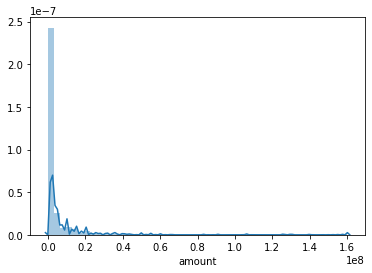

In [254]:
sns.distplot(all_invest['amount'])

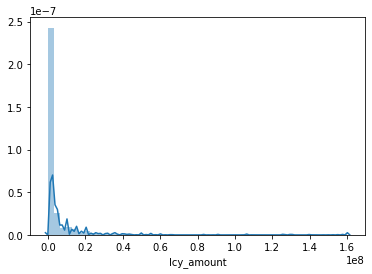

In [255]:
sns.distplot(all_invest['lcy_amount'])

In [0]:
all_invest.booking_date = pd.to_datetime(all_invest.booking_date)
all_invest.maturity_date = pd.to_datetime(all_invest.maturity_date)

In [0]:
all_invest['date_difference']=(all_invest.maturity_date - all_invest.booking_date)/np.timedelta64(1,'D')

In [258]:
all_invest.head()

,contract_ref_no,product,product_name,payment_method,currency,amount,lcy_amount,booking_date,maturity_date,rollover_allowed,tenor,rollover_count,contract_status,main_comp_rate,masked_account,date_difference
customer_unique_id,,,,,,,,,,,,,,,,
376921008,099FRDC151670009,FRDC,FIXED RATE DEPOSIT CLASSIC,B,NGN,2000000.00,2000000.00,2015-09-30,2015-12-14,N,182.0,0,L,11.0,00******30,75.0
637314002,099MTDB151770100,MTDB,TERM DEPOSITS,B,NGN,3025647.62,3025647.62,2015-09-30,2015-12-23,Y,180.0,0,L,11.0,00******72,84.0
523013005,099MTDB151910117,MTDB,TERM DEPOSITS,B,NGN,20000000.00,20000000.00,2015-09-30,2015-10-05,Y,91.0,0,A,11.0,00******42,5.0
18030000,099MTDB152660054,MTDB,TERM DEPOSITS,B,NGN,35408906.65,35408906.65,2015-09-30,2015-10-23,N,30.0,0,L,7.5,00******08,23.0
143966005,099MTDB152220012,MTDB,TERM DEPOSITS,B,NGN,400000.00,400000.00,2015-09-30,2016-02-02,Y,180.0,0,L,9.0,00******99,125.0


In [259]:
all_invest['product'].value_counts()

TBCS    905
MTDB    593
BAAC     26
MMCD      4
COMP      3
FRDC      2
ACSP      1
FRDB      1
Name: product, dtype: int64

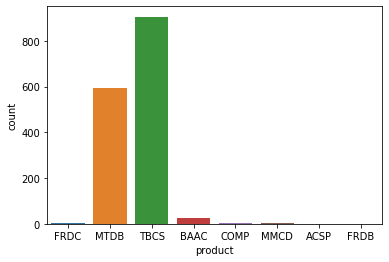

In [260]:
sns.countplot( x= 'product', data = all_invest)

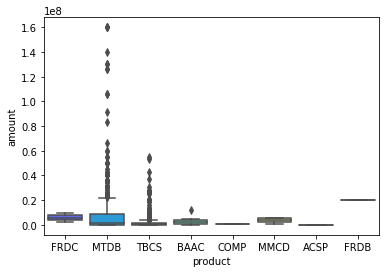

In [261]:
sns.boxplot( x ='product', y = 'amount', data = all_invest, palette = 'rainbow')

In [262]:
all_invest['contract_status'].value_counts()

L    1281
A     226
V      28
Name: contract_status, dtype: int64

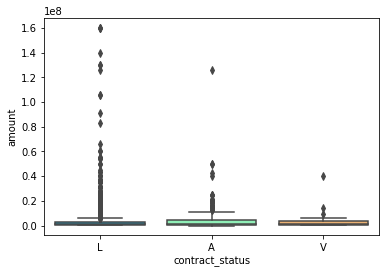

In [263]:
sns.boxplot( x ='contract_status', y = 'amount', data = all_invest, palette = 'rainbow')

In [0]:
all_invest = all_invest.groupby(all_invest.index).agg({'amount':'mean','tenor':'mean','date_difference':'mean'})

In [265]:
all_invest.head()

,amount,tenor,date_difference
customer_unique_id,,,
226008,600000.0,45.0,45.0
1321003,1100000.0,364.0,364.0
1352000,450000.0,31.0,28.0
2366007,150000.0,30.0,30.0
2471001,1000000.0,247.0,247.0


In [266]:
all_invest.shape

(377, 3)

In [0]:
all_invest.to_csv('df_invest.csv', encoding = 'utf-8', index = True)


In [268]:
df_invest = pd.read_csv('df_invest.csv',skiprows = 0)
df_invest.head()

,customer_unique_id,amount,tenor,date_difference
0,226008,600000.0,45.0,45.0
1,1321003,1100000.0,364.0,364.0
2,1352000,450000.0,31.0,28.0
3,2366007,150000.0,30.0,30.0
4,2471001,1000000.0,247.0,247.0


In [0]:
all_loans = pd.read_csv('all_loans.csv')

In [270]:
all_loans.head(10)

,CUSTOMER_UNIQUE_ID,LOAN_REF,PRODUCT_CODE,PRODUCT_NAME,BOOK_DATE,MATURITY_DATE,AMOUNT_FINANCED,CURRENCY,ACCOUNT_STATUS,MASKED_ACCOUNT
0,705881005,099AMPC182150644,AMPC,ACCESS MONEY PAYDAY ADVANCE,8/3/2018,9/2/2018,7000.0,NGN,L,06******98
1,569019008,099AMPC183111412,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,1000.0,NGN,L,00******48
2,340884012,099AMPC183111143,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,10000.0,NGN,L,07******49
3,19400009,099AMPC183110916,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,200000.0,NGN,L,00******53
4,83585009,099AMPC183110921,AMPC,ACCESS MONEY PAYDAY ADVANCE,11/7/2018,12/7/2018,14000.0,NGN,L,00******76
5,169099007,099AMPC190291665,AMPC,ACCESS MONEY PAYDAY ADVANCE,1/29/2019,2/28/2019,1500.0,NGN,L,00******51
6,616026000,099PDLP191069189,PDLP,PAYDAY ADVANCE,4/16/2019,5/16/2019,10000.0,NGN,L,06******68
7,91354010,099PDLP191625905,PDLP,PAYDAY ADVANCE,6/11/2019,7/11/2019,14000.0,NGN,L,07******17
8,312055003,099AMPC190282726,AMPC,ACCESS MONEY PAYDAY ADVANCE,1/28/2019,2/27/2019,124000.0,NGN,L,00******00
9,644154000,099AMPC181522469,AMPC,ACCESS MONEY PAYDAY ADVANCE,6/1/2018,7/1/2018,5000.0,NGN,L,00******04


In [271]:
all_loans.columns.to_list()

['CUSTOMER_UNIQUE_ID',
 'LOAN_REF',
 'PRODUCT_CODE',
 'PRODUCT_NAME',
 'BOOK_DATE',
 'MATURITY_DATE',
 'AMOUNT_FINANCED',
 'CURRENCY',
 'ACCOUNT_STATUS',
 'MASKED_ACCOUNT']

In [0]:
all_loans.columns = all_loans.columns.str.lower()


In [0]:
all_loans.set_index('customer_unique_id',inplace=True)

In [0]:
all_loans.index=all_loans.index.astype('int')

In [275]:
all_loans.isnull().sum()

loan_ref           0
product_code       0
product_name       0
book_date          0
maturity_date      0
amount_financed    0
currency           0
account_status     0
masked_account     0
dtype: int64

In [276]:
all_loans.shape

(278505, 9)

In [277]:
all_loans.dtypes

loan_ref            object
product_code        object
product_name        object
book_date           object
maturity_date       object
amount_financed    float64
currency            object
account_status      object
masked_account      object
dtype: object

In [0]:
all_loans.book_date = pd.to_datetime(all_loans.book_date)
all_loans.maturity_date = pd.to_datetime(all_loans.maturity_date)

In [0]:
all_loans['date_difference']=(all_loans.maturity_date - all_loans.book_date)/np.timedelta64(1,'D')

In [280]:
all_loans.head()

,loan_ref,product_code,product_name,book_date,maturity_date,amount_financed,currency,account_status,masked_account,date_difference
customer_unique_id,,,,,,,,,,
705881005,099AMPC182150644,AMPC,ACCESS MONEY PAYDAY ADVANCE,2018-08-03,2018-09-02,7000.0,NGN,L,06******98,30.0
569019008,099AMPC183111412,AMPC,ACCESS MONEY PAYDAY ADVANCE,2018-11-07,2018-12-07,1000.0,NGN,L,00******48,30.0
340884012,099AMPC183111143,AMPC,ACCESS MONEY PAYDAY ADVANCE,2018-11-07,2018-12-07,10000.0,NGN,L,07******49,30.0
19400009,099AMPC183110916,AMPC,ACCESS MONEY PAYDAY ADVANCE,2018-11-07,2018-12-07,200000.0,NGN,L,00******53,30.0
83585009,099AMPC183110921,AMPC,ACCESS MONEY PAYDAY ADVANCE,2018-11-07,2018-12-07,14000.0,NGN,L,00******76,30.0


In [281]:
all_loans.dtypes

loan_ref                   object
product_code               object
product_name               object
book_date          datetime64[ns]
maturity_date      datetime64[ns]
amount_financed           float64
currency                   object
account_status             object
masked_account             object
date_difference           float64
dtype: object

In [0]:
all_loans = all_loans.drop(columns = ['masked_account', 'loan_ref', 'product_name', 'currency'])

In [283]:
all_loans.head()

,product_code,book_date,maturity_date,amount_financed,account_status,date_difference
customer_unique_id,,,,,,
705881005,AMPC,2018-08-03,2018-09-02,7000.0,L,30.0
569019008,AMPC,2018-11-07,2018-12-07,1000.0,L,30.0
340884012,AMPC,2018-11-07,2018-12-07,10000.0,L,30.0
19400009,AMPC,2018-11-07,2018-12-07,200000.0,L,30.0
83585009,AMPC,2018-11-07,2018-12-07,14000.0,L,30.0


In [284]:
all_loans.isnull().sum()

product_code       0
book_date          0
maturity_date      0
amount_financed    0
account_status     0
date_difference    0
dtype: int64

In [0]:
product_code = all_loans.groupby(all_loans.index).product_code.apply(pd.Series.mode).sort_index().to_frame()
frame = pd.DataFrame(product_code)


In [286]:
frame.head()

,,product_code
customer_unique_id,,
56000,0,AMPC
62005,0,PDLP
104008,0,AMPC
175007,0,PDLP
200006,0,AMPC


In [287]:
frame.shape

(18896, 1)

In [288]:
frame.reset_index(drop = True)

,product_code
0,AMPC
1,PDLP
2,AMPC
3,PDLP
4,AMPC
...,...
18891,AMPC
18892,PDLP
18893,PDLP
18894,PDLP


In [0]:
amount = all_loans.groupby(all_loans.index).amount_financed.mean().sort_index().to_frame()
frame1 = pd.DataFrame(amount)

In [290]:
frame1.shape

(17986, 1)

In [291]:
frame1.reset_index(drop = True)

,amount_financed
0,56827.586207
1,72074.074074
2,46111.111111
3,5235.294118
4,74937.500000
...,...
17981,2323.529412
17982,8500.000000
17983,137183.874000
17984,18000.000000


In [0]:
account_status = all_loans.groupby(all_loans.index).account_status.apply(pd.Series.mode).sort_index().to_frame()
frame2 = pd.DataFrame(account_status)

In [293]:
frame2.reset_index(drop = True)

,account_status
0,L
1,L
2,L
3,L
4,L
...,...
18754,L
18755,L
18756,L
18757,L


In [0]:
date_difference = all_loans.groupby(all_loans.index).date_difference.mean().sort_index().to_frame()
frame3 = pd.DataFrame(date_difference)

In [295]:
frame3.reset_index(drop = True)

,date_difference
0,30.0
1,30.0
2,40.0
3,30.0
4,30.0
...,...
17981,30.0
17982,30.0
17983,149.4
17984,30.0


In [0]:
dfr = pd.concat([frame, frame2], axis = 1)

In [297]:
dfr.reset_index(drop = True)

,product_code,account_status
0,AMPC,L
1,PDLP,L
2,AMPC,L
3,PDLP,L
4,AMPC,L
...,...,...
19583,AMPC,L
19584,PDLP,L
19585,PDLP,L
19586,PDLP,L


In [298]:
dfr.head()

,,product_code,account_status
customer_unique_id,,,
56000,0,AMPC,L
62005,0,PDLP,L
104008,0,AMPC,L
175007,0,PDLP,L
200006,0,AMPC,L


In [0]:
loan_df1 = pd.concat([frame, frame2], axis = 1)



In [0]:
loan_df2 = pd.concat([frame3, frame1], axis = 1)


In [0]:
loan_df = pd.merge(loan_df1, loan_df2, on = 'customer_unique_id')

In [302]:
loan_df.shape

(19588, 4)

In [303]:
loan_df.head()

,product_code,account_status,date_difference,amount_financed
customer_unique_id,,,,
56000,AMPC,L,30.0,56827.586207
62005,PDLP,L,30.0,72074.074074
104008,AMPC,L,40.0,46111.111111
175007,PDLP,L,30.0,5235.294118
200006,AMPC,L,30.0,74937.500000


In [304]:
loan_df.isnull().sum()

product_code       692
account_status     829
date_difference      0
amount_financed      0
dtype: int64

In [0]:
loan_df = loan_df.dropna(axis = 0)

In [306]:
loan_df.isnull().sum()

product_code       0
account_status     0
date_difference    0
amount_financed    0
dtype: int64

In [307]:
loan_df.shape

(18067, 4)

In [308]:
loan_df.head()

,product_code,account_status,date_difference,amount_financed
customer_unique_id,,,,
56000,AMPC,L,30.0,56827.586207
62005,PDLP,L,30.0,72074.074074
104008,AMPC,L,40.0,46111.111111
175007,PDLP,L,30.0,5235.294118
200006,AMPC,L,30.0,74937.500000


In [309]:
loan_df['product_code'].value_counts()

PDLP    9852
AMPC    7905
STPL     210
DFPS      40
SADV      20
PDSS      20
KPLA      10
MPTA       4
MPTL       3
STLP       1
KPLS       1
STLM       1
Name: product_code, dtype: int64

In [310]:
loan_df['account_status'].value_counts()

L    15419
A     2647
V        1
Name: account_status, dtype: int64

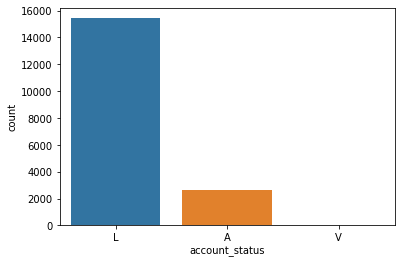

In [311]:
sns.countplot( x= 'account_status', data = loan_df)

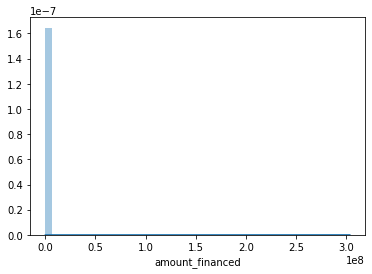

In [312]:
sns.distplot(loan_df['amount_financed'])

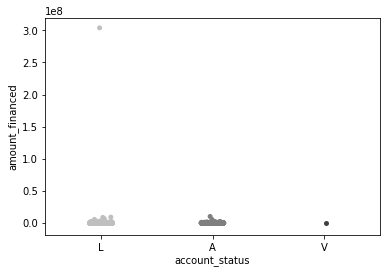

In [313]:
sns.stripplot(x = 'account_status', y = 'amount_financed', data = loan_df, jitter = True, palette = 'binary', split = True)

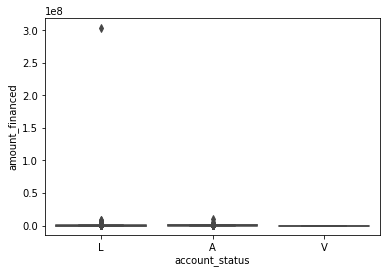

In [314]:
sns.boxplot( x ='account_status', y = 'amount_financed', data = loan_df, palette = 'rainbow')

In [0]:
loan_df.to_csv('df_loan.csv', encoding = 'utf-8', index = True)


In [316]:
df_loan = pd.read_csv('df_loan.csv',skiprows = 0)
df_loan.head()

,customer_unique_id,product_code,account_status,date_difference,amount_financed
0,56000,AMPC,L,30.0,56827.586207
1,62005,PDLP,L,30.0,72074.074074
2,104008,AMPC,L,40.0,46111.111111
3,175007,PDLP,L,30.0,5235.294118
4,200006,AMPC,L,30.0,74937.500000


In [0]:
all_loanapp = pd.read_csv('all_loans_application.csv')

In [318]:
all_loanapp.head(10)

,CUSTOMER_UNIQUE_ID,OFFERID,INCR_ALLOWED,APPLIED_AMOUNT,DATE_OF_APPLY,APPLICATION_STATUS,MODULE,LOAN_CLASSIFICATION
0,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:36:23 AM,D,AMPC,PERFORMING
1,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:37:10 AM,D,AMPC,PERFORMING
2,562966000,099AMPC173040539,370803.43,1040.0,10/31/2017 10:39:06 AM,D,AMPC,PERFORMING
3,867156003,099AMPC173040543,15278.69,13000.0,10/31/2017 10:44:39 AM,D,AMPC,PERFORMING
4,747196003,099AMPC173040545,136863.90,1000.0,10/31/2017 10:44:58 AM,D,AMPC,PERFORMING
5,867176003,099AMPC173040546,30248.31,27000.0,10/31/2017 10:46:16 AM,D,AMPC,PERFORMING
6,562966000,099AMPC173040547,370803.43,1234.0,10/31/2017 10:46:23 AM,D,AMPC,PERFORMING
7,830958004,099AMPC173040548,5832.44,7500.0,10/31/2017 10:47:21 AM,D,AMPC,PERFORMING
8,846122009,099AMPC173040549,37463.88,15000.0,10/31/2017 10:47:31 AM,D,AMPC,PERFORMING
9,886899001,099AMPC173040550,16665.00,15000.0,10/31/2017 10:48:01 AM,D,AMPC,PERFORMING


In [319]:
all_loanapp.isnull().sum()

CUSTOMER_UNIQUE_ID     0
OFFERID                0
INCR_ALLOWED           0
APPLIED_AMOUNT         0
DATE_OF_APPLY          0
APPLICATION_STATUS     0
MODULE                 0
LOAN_CLASSIFICATION    0
dtype: int64

In [320]:
all_loanapp.columns.to_list()

['CUSTOMER_UNIQUE_ID',
 'OFFERID',
 'INCR_ALLOWED',
 'APPLIED_AMOUNT',
 'DATE_OF_APPLY',
 'APPLICATION_STATUS',
 'MODULE',
 'LOAN_CLASSIFICATION']

In [0]:
all_loanapp.columns = all_loanapp.columns.str.lower()

In [0]:

all_loanapp.set_index('customer_unique_id',inplace=True)


In [0]:
all_loanapp.index=all_loanapp.index.astype('int')

In [324]:
all_loanapp.head()

,offerid,incr_allowed,applied_amount,date_of_apply,application_status,module,loan_classification
customer_unique_id,,,,,,,
562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:36:23 AM,D,AMPC,PERFORMING
562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:37:10 AM,D,AMPC,PERFORMING
562966000,099AMPC173040539,370803.43,1040.0,10/31/2017 10:39:06 AM,D,AMPC,PERFORMING
867156003,099AMPC173040543,15278.69,13000.0,10/31/2017 10:44:39 AM,D,AMPC,PERFORMING
747196003,099AMPC173040545,136863.90,1000.0,10/31/2017 10:44:58 AM,D,AMPC,PERFORMING


In [325]:
all_loanapp.describe()

,incr_allowed,applied_amount
count,2.317200e+04,2.317200e+04
mean,1.030203e+04,4.983853e+04
std,2.693845e+05,1.270509e+05
min,-3.961407e+07,1.000000e+03
25%,0.000000e+00,6.000000e+03
50%,0.000000e+00,1.300000e+04
75%,1.726870e+04,3.200000e+04
max,1.716254e+06,3.500000e+06


In [326]:
all_loanapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23172 entries, 562966000 to 65167007
Data columns (total 7 columns):
offerid                23172 non-null object
incr_allowed           23172 non-null float64
applied_amount         23172 non-null float64
date_of_apply          23172 non-null object
application_status     23172 non-null object
module                 23172 non-null object
loan_classification    23172 non-null object
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [327]:
all_loanapp['module'].value_counts()

AMPC    10000
LATO    10000
STP      2602
DFPS      570
Name: module, dtype: int64

In [328]:
all_loanapp['application_status'].value_counts()

D    23172
Name: application_status, dtype: int64

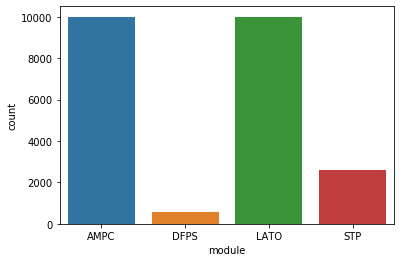

In [329]:
sns.countplot( x= 'module', data = all_loanapp)

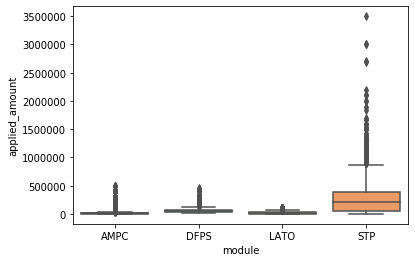

In [330]:
sns.boxplot( x ='module', y = 'applied_amount', data = all_loanapp, palette = 'rainbow')

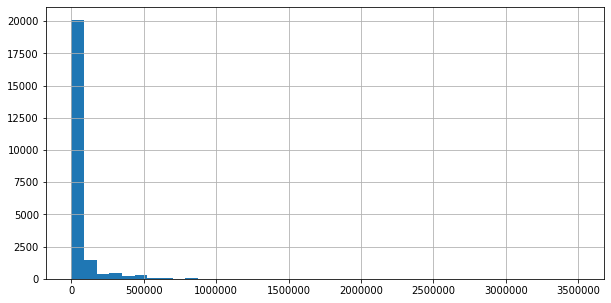

In [331]:
plt.figure(figsize=(10,5))
all_loanapp['applied_amount'].hist(bins = 40)

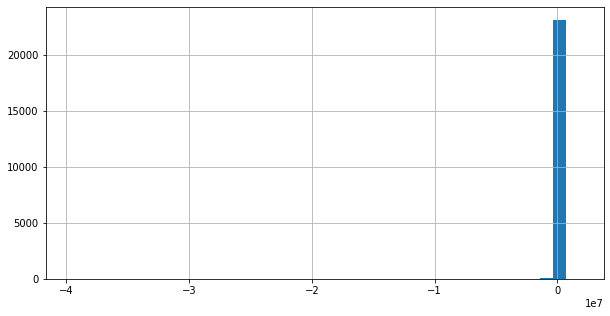

In [338]:
plt.figure(figsize=(10,5))
all_loanapp['incr_allowed'].hist(bins = 40)

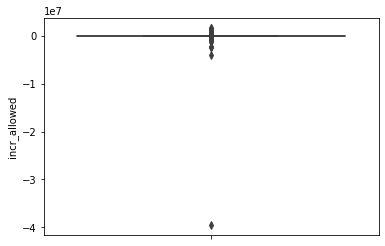

In [339]:
sns.boxplot(y = 'incr_allowed', data = all_loanapp)

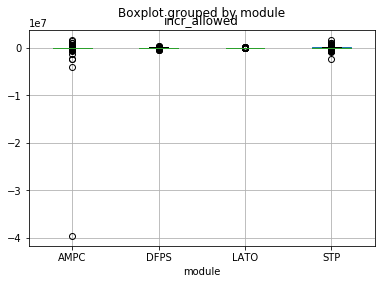

In [340]:
all_loanapp.boxplot(column = 'incr_allowed', by = 'module')

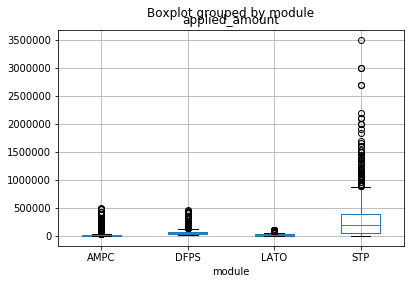

In [341]:
all_loanapp.boxplot(column = 'applied_amount', by = 'module')

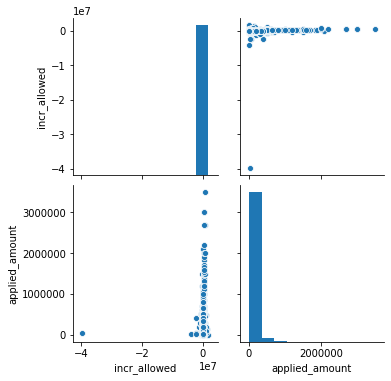

In [342]:
sns.pairplot(all_loanapp, palette = 'Dark2')

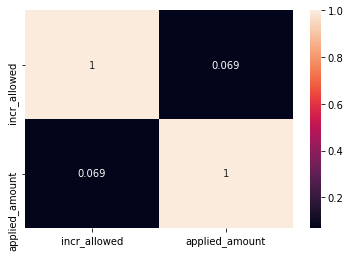

In [343]:
sns.heatmap(all_loanapp.corr(), annot = True)

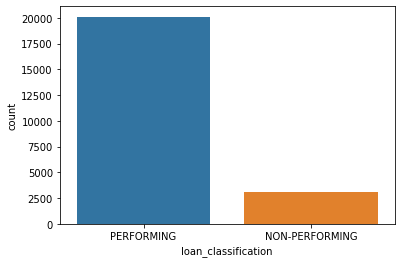

In [344]:
sns.countplot( x= 'loan_classification', data = all_loanapp)

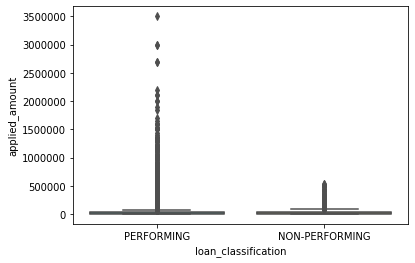

In [345]:
sns.boxplot( x ='loan_classification', y = 'applied_amount', data = all_loanapp, palette = 'rainbow')

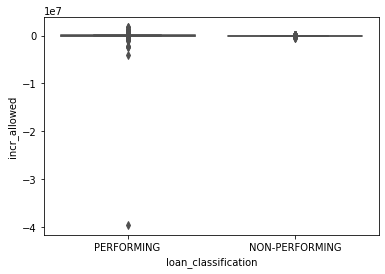

In [346]:
sns.boxplot( x ='loan_classification', y = 'incr_allowed', data = all_loanapp, palette = 'rainbow')

In [349]:
all_loanapp.shape

(23172, 7)

In [0]:
all_loanapp.to_csv('df_loanapp.csv', encoding = 'utf-8', index = True)


In [435]:
df_loanapp = pd.read_csv('df_loanapp.csv')
df_loanapp.head()

,customer_unique_id,offerid,incr_allowed,applied_amount,date_of_apply,application_status,module,loan_classification
0,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:36:23 AM,D,AMPC,PERFORMING
1,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:37:10 AM,D,AMPC,PERFORMING
2,562966000,099AMPC173040539,370803.43,1040.0,10/31/2017 10:39:06 AM,D,AMPC,PERFORMING
3,867156003,099AMPC173040543,15278.69,13000.0,10/31/2017 10:44:39 AM,D,AMPC,PERFORMING
4,747196003,099AMPC173040545,136863.90,1000.0,10/31/2017 10:44:58 AM,D,AMPC,PERFORMING


In [0]:
all_transc = pd.read_csv('all_transactions_digital.csv', low_memory=False)

In [404]:

all_transc.head(10)

,CUSTOMER_UNIQUE_ID,MASKED_ACCT,TRN_REF_NO,AC_CCY,DRCR_IND,TRN_CODE,FCY_AMOUNT,EXCH_RATE,LCY_AMOUNT,TRN_DT
0,639103002,00******23,133ICEBNGN 00002,NGN,C,CIN,NaN,NaN,0.01,2019-09-30 00:00:00
1,563391007,00******98,0981356192730075,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00
2,563391007,00******98,098AWRI801180wJs,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00
3,563391007,00******98,098AWRI801180wKb,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00
4,563391007,00******98,098AWRI801180dLN,NGN,D,CWR,NaN,NaN,2000.00,2019-09-30 00:00:00
5,563391007,00******98,098AWRI801180dLN,NGN,D,FFR,NaN,NaN,65.00,2019-09-30 00:00:00
6,563391007,00******98,099ZTRF19273DE9D,NGN,D,MLL,0.0,NaN,7000.00,2019-09-30 00:00:00
7,563391007,00******98,099MJRL19273IG3J,NGN,D,QTM,NaN,NaN,200.00,2019-09-30 00:00:00
8,563391007,00******98,099MJRL19273AQp9,NGN,D,SAC,NaN,NaN,112.00,2019-09-30 00:00:00
9,393945004,00******04,239ACWO8011801OE,NGN,D,CWU,NaN,NaN,2000.00,2019-09-30 00:00:00


In [405]:
all_transc.columns.to_list()

['CUSTOMER_UNIQUE_ID',
 'MASKED_ACCT',
 'TRN_REF_NO',
 'AC_CCY',
 'DRCR_IND',
 'TRN_CODE',
 'FCY_AMOUNT',
 'EXCH_RATE',
 'LCY_AMOUNT',
 'TRN_DT']

In [0]:
all_transc.columns = all_transc.columns.str.lower()

In [0]:
all_transc.set_index('customer_unique_id',inplace=True)

In [0]:
all_transc.index=all_transc.index.astype('int')

In [409]:
all_transc.isnull().sum()

masked_acct        0
trn_ref_no         0
ac_ccy             0
drcr_ind           0
trn_code           0
fcy_amount     22583
exch_rate      26100
lcy_amount         0
trn_dt             0
dtype: int64

In [410]:
all_transc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26130 entries, 639103002 to 604416007
Data columns (total 9 columns):
masked_acct    26130 non-null object
trn_ref_no     26130 non-null object
ac_ccy         26130 non-null object
drcr_ind       26130 non-null object
trn_code       26130 non-null object
fcy_amount     3547 non-null float64
exch_rate      30 non-null float64
lcy_amount     26130 non-null float64
trn_dt         26130 non-null object
dtypes: float64(3), object(6)
memory usage: 2.0+ MB


In [0]:

all_transc = all_transc.loc[:,all_transc.isnull().mean() < 0.8]

In [412]:
all_transc.isnull().sum()

masked_acct    0
trn_ref_no     0
ac_ccy         0
drcr_ind       0
trn_code       0
lcy_amount     0
trn_dt         0
dtype: int64

In [413]:
all_transc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26130 entries, 639103002 to 604416007
Data columns (total 7 columns):
masked_acct    26130 non-null object
trn_ref_no     26130 non-null object
ac_ccy         26130 non-null object
drcr_ind       26130 non-null object
trn_code       26130 non-null object
lcy_amount     26130 non-null float64
trn_dt         26130 non-null object
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [414]:
all_transc.head()

,masked_acct,trn_ref_no,ac_ccy,drcr_ind,trn_code,lcy_amount,trn_dt
customer_unique_id,,,,,,,
639103002,00******23,133ICEBNGN 00002,NGN,C,CIN,0.01,2019-09-30 00:00:00
563391007,00******98,0981356192730075,NGN,D,CWR,2000.00,2019-09-30 00:00:00
563391007,00******98,098AWRI801180wJs,NGN,D,CWR,2000.00,2019-09-30 00:00:00
563391007,00******98,098AWRI801180wKb,NGN,D,CWR,2000.00,2019-09-30 00:00:00
563391007,00******98,098AWRI801180dLN,NGN,D,CWR,2000.00,2019-09-30 00:00:00


In [0]:
all_transc = all_transc.drop(columns = ['masked_acct', 'trn_ref_no', 'trn_dt'])

In [416]:
all_transc.head()

,ac_ccy,drcr_ind,trn_code,lcy_amount
customer_unique_id,,,,
639103002,NGN,C,CIN,0.01
563391007,NGN,D,CWR,2000.00
563391007,NGN,D,CWR,2000.00
563391007,NGN,D,CWR,2000.00
563391007,NGN,D,CWR,2000.00


In [417]:
all_transc['trn_code'].value_counts()

FTM    5476
QTM    2711
FWR    2176
NIP    1662
CWR    1620
       ... 
CNC       1
FDC       1
DTT       1
FDB       1
DIP       1
Name: trn_code, Length: 101, dtype: int64

In [418]:
all_transc['drcr_ind'].value_counts()

D    21265
C     4865
Name: drcr_ind, dtype: int64

In [419]:
all_transc['ac_ccy'].value_counts()

NGN    25764
USD      312
GBP       34
EUR       20
Name: ac_ccy, dtype: int64

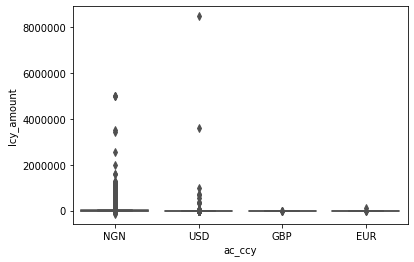

In [420]:
sns.boxplot( x ='ac_ccy', y = 'lcy_amount', data = all_transc, palette = 'rainbow')

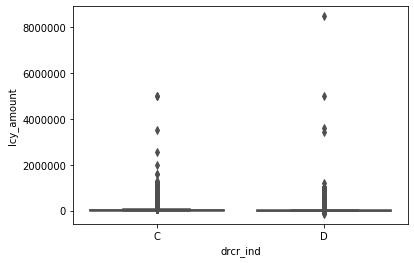

In [421]:
sns.boxplot( x ='drcr_ind', y = 'lcy_amount', data = all_transc, palette = 'rainbow')

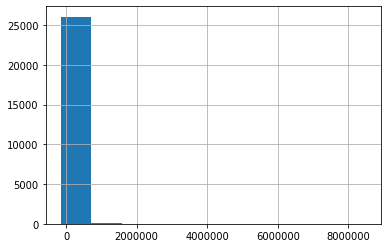

In [422]:
all_transc['lcy_amount'].hist()

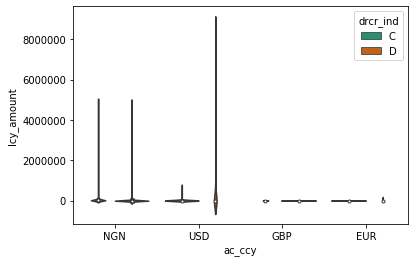

In [423]:
sns.violinplot(x = 'ac_ccy', y = 'lcy_amount', data = all_transc, hue = 'drcr_ind', palette = 'Dark2')

In [424]:
all_transc.loc[639103002]

,ac_ccy,drcr_ind,trn_code,lcy_amount
customer_unique_id,,,,
639103002,NGN,C,CIN,0.01
639103002,NGN,D,CWU,16000.00


In [425]:
all_transc.loc[562966000]

ac_ccy         NGN
drcr_ind         D
trn_code       FWR
lcy_amount    6900
Name: 562966000, dtype: object

In [426]:
all_transc.loc[563391007]

,ac_ccy,drcr_ind,trn_code,lcy_amount
customer_unique_id,,,,
563391007,NGN,D,CWR,2000.0
563391007,NGN,D,CWR,2000.0
563391007,NGN,D,CWR,2000.0
563391007,NGN,D,CWR,2000.0
563391007,NGN,D,FFR,65.0
563391007,NGN,D,MLL,7000.0
563391007,NGN,D,QTM,200.0
563391007,NGN,D,SAC,112.0


In [0]:
all_transc = all_transc.groupby([all_transc.index, all_transc.drcr_ind])[['lcy_amount']].sum()

In [428]:
all_transc.head()

lcy_amount
customer_unique_id drcr_ind            
56000              D               20.0
104008             C            50000.0
                   D            28000.0
200006             D            10000.0
233018             D               44.0

In [0]:
all_transc = pd.pivot_table(all_transc.reset_index(),index='customer_unique_id',columns='drcr_ind', values='lcy_amount',aggfunc=np.sum).reset_index()[['customer_unique_id', 'C', 'D']]

In [0]:
all_transc.set_index('customer_unique_id',inplace=True)

In [431]:
all_transc1.isnull().sum()

drcr_ind
C    3726
D     610
dtype: int64

In [432]:
all_transc1.shape

(6788, 2)

In [433]:
all_transc1.head()

drcr_ind,C,D
customer_unique_id,,
56000,NaN,20.0
104008,50000.0,28000.0
200006,NaN,10000.0
233018,NaN,44.0
320010,NaN,2000.0


In [0]:
all_demo.to_csv('df_demo.csv', encoding = 'utf-8', index = True)
df_demo = pd.read_csv('df_demo.csv',skiprows = 0)
df_demo.head()